# Сессия 2

Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import datetime

настройки отображения пандаса

In [2]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

загрузка файлов

In [3]:
train_ses = pd.read_csv("КЗ Юниоры/Сессия1/train_ses.csv")
train = pd.read_csv("train.csv", index_col=0)

In [4]:
site = pd.read_pickle("КЗ Юниоры/Сессия1/site.pkl")

In [5]:
train

,session_id,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10,target,time_diff
0,2,890,941.0,3847.0,941.0,942.0,3846.0,3847.0,3846.0,1516.0,1518.0,0,26.0
1,3,14769,39.0,14768.0,14769.0,37.0,39.0,14768.0,14768.0,14768.0,14768.0,0,7.0
2,4,782,782.0,782.0,782.0,782.0,782.0,782.0,782.0,782.0,782.0,0,270.0
3,5,22,177.0,175.0,178.0,177.0,178.0,175.0,177.0,177.0,178.0,0,246.0
4,7,803,23.0,5956.0,17513.0,37.0,21.0,803.0,17514.0,17514.0,17514.0,0,102.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
231047,253556,9041,291.0,23.0,52.0,23.0,2371.0,2371.0,2371.0,52.0,52.0,0,16.0
231048,253557,3474,3474.0,141.0,2428.0,106.0,2428.0,2428.0,2428.0,2428.0,148.0,0,59.0
231049,253558,12727,12727.0,2215.0,38.0,2215.0,23.0,25444.0,2215.0,23.0,21.0,0,3.0
231050,253560,812,676.0,814.0,22.0,39.0,812.0,814.0,570.0,22.0,570.0,0,2.0


In [6]:
test_ses = pd.read_csv("КЗ Юниоры/Сессия1/test_ses.csv")
test = pd.read_csv("test.csv", index_col=0)

In [7]:
train_ses = train_ses[train_ses['site10'].notna()]
train_ses = train_ses.reset_index(drop=True)

In [8]:
test_ses = test_ses[test_ses['site10'].notna()]
test_ses = test_ses.reset_index(drop=True)

Функция создание новых признаков:
1. признак, представляющий собой число вида ГГГГММ от той даты, когда проходила сессия.
2. время затраченное на посещение 10 сайтов в секундах, то есть по сути разница time10 и time1
3. максимальное кол-во посещения одинаковых сайтов, то есть в одной сессии пользователь посетил один и тот же сайт например 5 раз

In [9]:
def new_features(df):
    df["ym"] = df.apply(lambda x: "".join(x["time1"][:x["time1"].rfind("-")].split("-")), axis=1)
    
    df["time_diff"] = df.apply(lambda x: (datetime.datetime.strptime(x["time10"], '%Y-%m-%d %H:%M:%S') -
 datetime.datetime.strptime(x["time1"], '%Y-%m-%d %H:%M:%S')).total_seconds(), axis=1)
    
    df["max_repeat"] = df[["site1","site2","site3","site4","site5","site6","site7","site8","site9","site10"]].apply(lambda x: x.value_counts().max(), axis=1)
    
    df = df.astype({"ym":"int64"})
    return df 

Добавление новых признаков к данным

In [10]:
train_ses = new_features(train_ses)

In [11]:
test_ses = new_features(test_ses)

In [14]:
train_ses.drop(["time1","time2","time3","time4","time5","time6","time7","time8","time9","time10"], axis=1, inplace=True)
test_ses.drop(["time1","time2","time3","time4","time5","time6","time7","time8","time9","time10"], axis=1, inplace=True)

In [15]:
train_ses.to_csv("train.csv")
test_ses.to_csv("test.csv")

### Plotting

Построение графиков

Первый график кол-во повторов по оси Х, а по оси У плотность распрееления таргета.
Синим обозначен таргет равный 0, красным 1. 

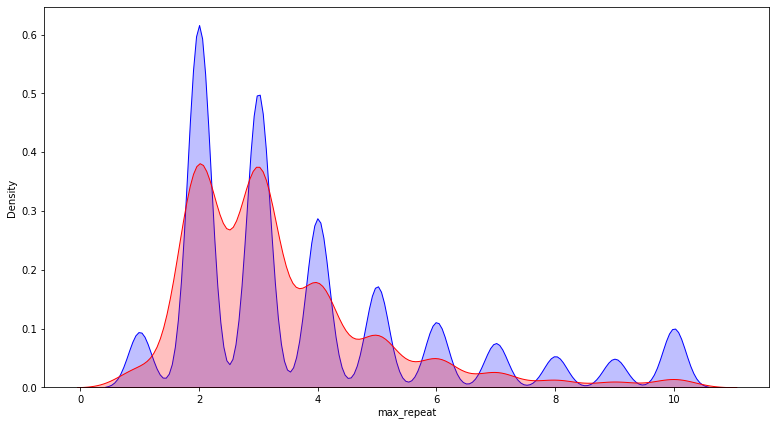

In [29]:
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(train_ses.loc[(train_ses['target'] == 0),'max_repeat'] , color='b',shade=True,label='0')
ax=sns.kdeplot(train_ses.loc[(train_ses['target'] == 1),'max_repeat'] , color='r',shade=True, label='1')

Второй график разница во времени в зависимости от таргета. Опять синий цвет 0, красный 1. 
На графике видно что у времени приближенному к нулю таргет равен 1, потом он сменяется на нулевой таргет.

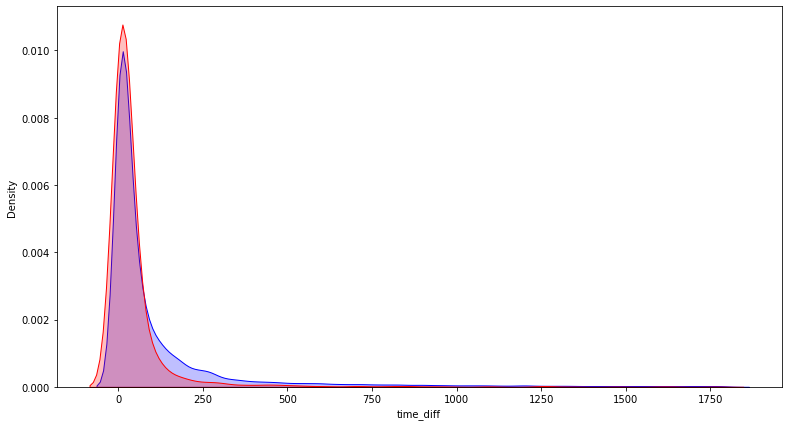

In [39]:
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(train_ses.loc[(train_ses['target'] == 0),'time_diff'] , color='b',shade=True,label='0')
ax=sns.kdeplot(train_ses.loc[(train_ses['target'] == 1),'time_diff'] , color='r',shade=True, label='1')

Третий график признак, представляющий собой число вида ГГГГММ от таргета. Красный цвет 1, синий 0. Видно что слева и справа от синих пиков преобладает таргет 1.

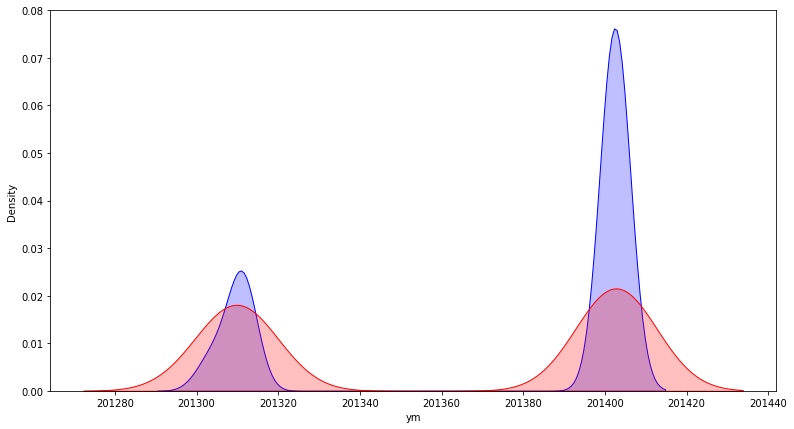

In [40]:
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(train_ses.loc[(train_ses['target'] == 0),'ym'] , color='b',shade=True,label='0')
ax=sns.kdeplot(train_ses.loc[(train_ses['target'] == 1),'ym'] , color='r',shade=True, label='1')

Четвертый это то какой сайт был посещен первым в зависимости от таргета. на нем видно что есть отрезок где красный таргет 1, преобладает над синим таргетом 0.

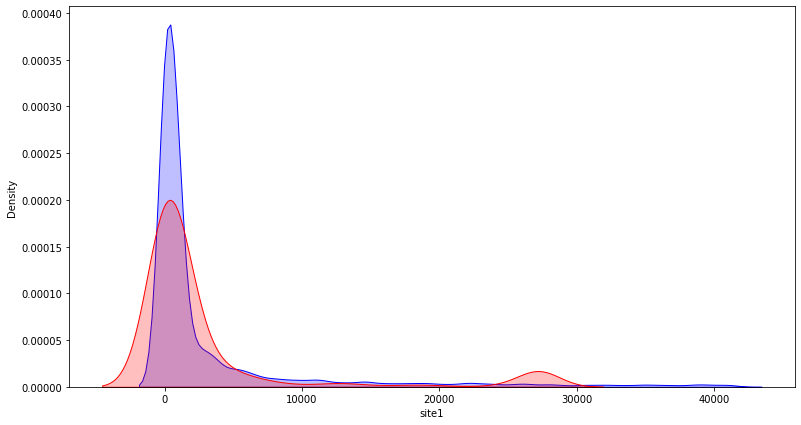

In [41]:
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(train_ses.loc[(train_ses['target'] == 0),'site1'] , color='b',shade=True,label='0')
ax=sns.kdeplot(train_ses.loc[(train_ses['target'] == 1),'site1'] , color='r',shade=True, label='1')

Пятый график показывает распределение таргета от кол-ва повторений. Видно что таргет чаще появляется в значениях повтора 2-5

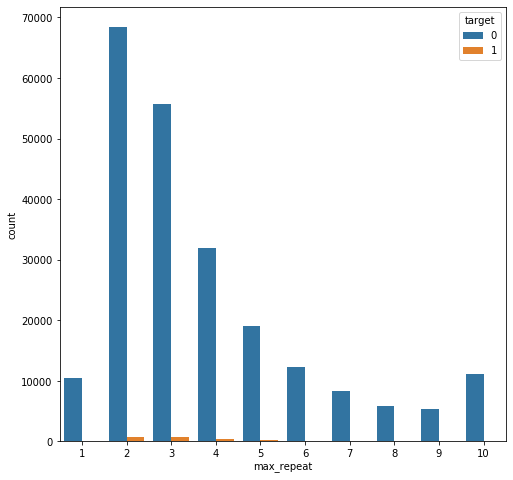

In [43]:
fig = plt.figure(figsize=(8,8))
sns.countplot(x = train_ses['max_repeat'], hue = train_ses["target"])

Шестой график распределение таргета по признаку, представляющему собой число вида ГГГГММ. Ораньжевый цвет обозначает появление таргета 1

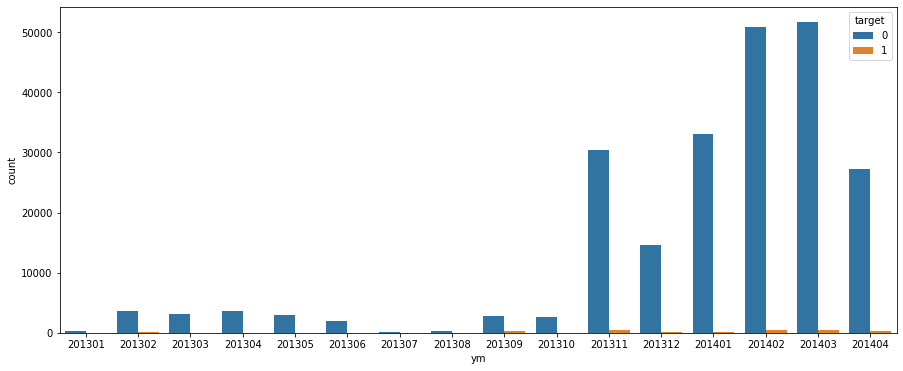

In [56]:
fig = plt.figure(figsize=(15,6))
sns.countplot(x = train_ses['ym'], hue=train_ses["target"])